# Exercise 1

In [8]:
"""
creates a forest of size n with an occupancie probability of p. Note that we actually create a forrest surrounded 
by a frame of 0s. This makes it easyer later on to calculate the burning trees as we won't have to check for 
the boundary.
"""

function generate_lattice(n::Integer, p::Real)
    lat = zeros(Int8, n+2, n+2)
    lat[2:end-1, 2:end-1] = Int8.(rand(n, n) .< p)
    return lat
end

function plot_lattice(lat::Matrix)
    m = maximum(lat) + 1
    colors = [:white, :green, :red, :black][1:m]
    heatmap(lat[2:end-1, 2:end-1], c = palette(colors), legend = :none)
    plot!(lims=(.5,size(lat)[1]-1.5))
    plot!(showaxis = false, ticks = false, aspect_ratio = :equal)
    #savefig("lattice")
end


plot_lattice (generic function with 1 method)

## Task 1

In [6]:
using Plots
using Random
using DataStructures
#using ColorShemes

In [3]:
"""
#maps a 2d array as a heatmap
function map_it(L, colorado = [:white, :green, :red])
    #colorado = palette([:white, :green, :red])
    plt = heatmap(L,color= cgrad(colorado), categorical = true,width  = 10, heigth = 10, fmt = :png)
    #gui(Plot)
    #savefig(plt, "/Users/Paul/Desktop/map_1.png")
    return plt
end
"""

"#maps a 2d array as a heatmap\nfunction map_it(L, colorado = [:white, :green, :red])\n    #colorado = palette([:white, :green, :red])\n    plt = heatmap(L,color= cgrad(colorado), categorical = true,width  = 10, heigth = 10, fmt = :png)\n    #gui(Plot)\n    #savefig(plt, \"/Users/Paul/Desktop/map_1.png\")\n    return plt\nend\n"

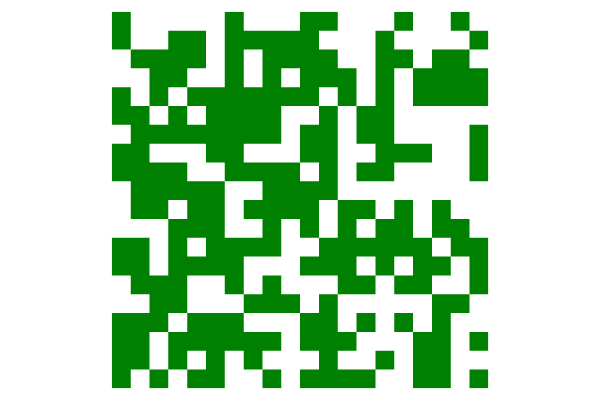

In [9]:
Random.seed!(42) #this is a joke refering to "the hitchhiker's guide to the galaxy"
#but what it does is setting the seed for the command random to 42 such that the result stays the same!
forest = generate_lattice(20,0.58)
plot_lattice(forest)

## Task 2


In [420]:
"""
#creates a fire in row 1
function start_the_fire!(A)
    for i in 1:size(A,1)
        if A[i,1] == 1 
            A[i,1] = 2
        end
    end
    count_time(A)
end
"""

start_the_fire! (generic function with 2 methods)

In [460]:
"""
#jetzt versuchen wir die timestep methode zu implementieren
function count_time(B)

    s = size(B,1)
    A = copy(B)
    for time in 2:1000
        for x in 1:s
            for y in 1:s
                if B[x,y] == time
                    
                    if x > 1 
                        if B[x-1,y] == 1
                            B[x-1,y] = time+1
                            A[x-1,y] = 2
                        end 
                    end
                    if x < s
                        if B[x+1,y] == 1
                            B[x+1,y] = time+1
                            A[x+1,y] = 2
                        end
                    end
                    if y > 1
                        if B[x,y-1] == 1
                            B[x,y-1] = time+1
                            A[x,y-1] = 2
                        end
                    end
                    if y < s
                        if B[x,y+1] == 1
                            B[x,y+1] = time+1
                            A[x,y+1] = 2
                        end
                    
                    else 
                        break
                    end
                end
            end
        end
    end
    return A
end
"""

count_time (generic function with 1 method)

In [ ]:
"""
function percolation_test(A)
    s = size(A,1)
    percolation = false
    for i in 1:s
        if A[i,s] == 2
            #println("the system percolates")
            percolation = true
        end
    end
    return percolation
end
"""

In [28]:
"""
A = create_forest(100,0.58)
B = start_the_fire!(A)

if percolation_test(B) == true
    println("Der Wald brännt durch")
else 
    println("Das Feuer breitet sich nicht weiter aus")
end
map_it(B)
"""

"A = create_forest(100,0.58)\nB = start_the_fire!(A)\n\nif percolation_test(B) == true\n    println(\"Der Wald brännt durch\")\nelse \n    println(\"Das Feuer breitet sich nicht weiter aus\")\nend\nmap_it(B)\n"

In [11]:
"""
this function starts the fire, then propagates it and returns if we have a percolation or not.
If yes it should return the shortest percolation path.
"""
function compute_percolation!(lat::Matrix)
    q = Queue{Tuple{Int64, Int64}}()
    #step 1: set the first row on fire and store all burning trees in a queue q
    np1 = size(lat)[1]-1  # n+1
    # Burn the first column (as julia is colum-major it is more efficient to iterate threw colums)
    for i in 2:np1
        if lat[i,2] == 1
            lat[i,2] = 2
            enqueue!(q,(i,2))
        end
    end
    
    Nsteps = 0
    #step 2: we remove the burning trees from the queue and burn all the neighbouring trees and put them into the queue until the queue is empty
    while(!isempty(q))
        Nsteps += 1

        qLen = length(q)
        for _ in 1:qLen
            (i,j) = dequeue!(q)
            if j == np1#this is the shortest path if we arrive at the right side
                return Nsteps
            end
            for (i2,j2) in [(i-1,j),(i+1,j),(i,j-1),(i,j+1)]
                if(lat[i2,j2]==1)
                    lat[i2,j2] = 2
                    enqueue!(q,(i2,j2))
                end
            end                            
        end        
    end
    
    
    return -1
end

compute_percolation!

the forest percolates with smalest path length  = 146


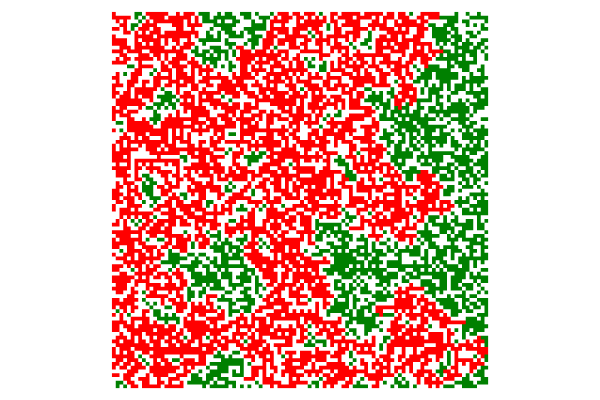

In [17]:
Random.seed!()
forest1 = generate_lattice(100,0.6)
x = compute_percolation!(forest1)
if(x>0) 
    println("the forest percolates with smalest path length  = $x")
else 
    println("there is no percolation")
end
plot_lattice(forest1)


## Task 2b

In [19]:
#paints the percolation cluster black and counts how many trees in this cluster are burning
function compute_the_size!(lat::Matrix)
    
    q1 = Queue{Tuple{Int64, Int64}}()
    np1 = size(lat)[1]-1  # n+1

    for k in 2:np1
        if lat[k,np1] == 2
            lat[k,np1] = 3
            enqueue!(q1,(k,np1))
        end
    end
    
    N = length(q1)
    
    while(!isempty(q1))
        
        len = length(q1)
        for _ in 1:len
            (i,j) = dequeue!(q1)
            for (i2,j2) in [(i-1,j),(i+1,j),(i,j-1),(i,j+1)]
                if (lat[i2,j2] == 2) || (lat[i2,j2] == 1)
                    N += 1
                    lat[i2,j2] = 3
                    enqueue!(q1,(i2,j2))
                end
            end
        end
    end
    return N
end

compute_the_size! (generic function with 1 method)

the percolation cluster contains 3172 trees
this occupies 7.93% of the total cluster size


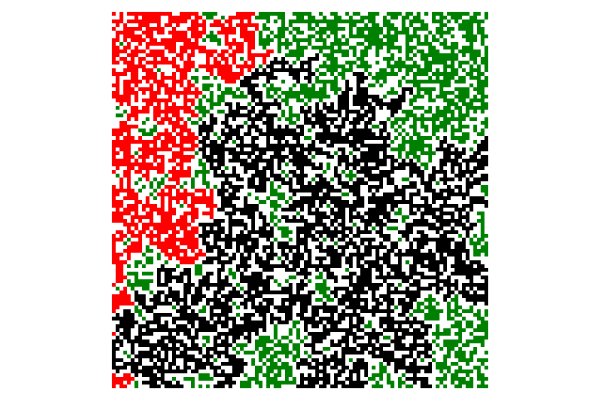

In [26]:
Random.seed!()
forest2 = generate_lattice(100,0.6)
compute_percolation!(forest2)
N = compute_the_size!(forest2)
println("the percolation cluster contains $N trees")
println("this occupies $(N/(200*200)*100)% of the total cluster size")
plot_lattice(forest2)

## Task 3

In [27]:
function count_percolations(L::Integer, p::Real, m::Integer)

    perculates = zeros(m)
    length = zeros(m)

    for i in 1:m
        Random.seed!()
        forest = generate_lattice(L,p)
        x = compute_percolation!(forest)
        if x > 0
            length[i] = x
            perculates[i] = 1
        end

    end
    
    perculation_percentage = sum(perculates)/m
    average_length = sum(length)/sum(perculates)
    
    return perculation_percentage, average_length
end

count_percolations (generic function with 1 method)

In [28]:
L = 200
p = 0.59
N = 1000
per,av = count_percolations(L,p,N)
println("for L=$L and p=$p the lattice perculates in $(per*100)%")
println("The average length of one perculation is $(av) trees")

for L=200 and p=0.59 the lattice perculates in 39.1%
The average length of one perculation is 384.0997442455243 trees


In [231]:
p = 0.59
N = 1000
P = LinRange(0,1,100)
L = [10,20,50,100,200,500]


Y1 = zeros(100)
for i in 1:100
    Y1[i],_ = count_percolations(L[1],P[i],N)
end

println("nächster step")
Y2 = zeros(100)
for i in 1:100
    Y2[i],_ = count_percolations(L[2],P[i],N)
end

println("nächster step")
Y3 = zeros(100)
for i in 1:100
    Y3[i],_ = count_percolations(L[3],P[i],N)
end

println("nächster step")
Y4 = zeros(100)
for i in 1:100
    Y4[i],_ = count_percolations(L[4],P[i],N)
end

println("nächster step")
Y5 = zeros(100)
for i in 1:100
    Y5[i],_ = count_percolations(L[5],P[i],N)
end

println("nächster step")
Y6 = zeros(100)
for i in 1:100
    Y6[i],_ = count_percolations(L[6],P[i],N)
end



nächster step
nächster step
nächster step
nächster step
nächster step


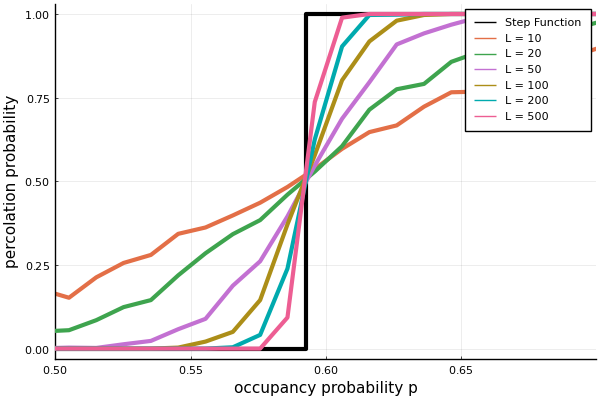

In [232]:
pyplot()
pc = 0.59274
plot([0.5, pc, pc, 0.7], [0., 0., 1., 1.],label = "Step Function", linewidth = 3, linestyle = :solid, linecolor = :black)
plot!(P,Y1,label = "L = $(L[1])",linewidth = 3)
plot!(P,Y2,label = "L = $(L[2])",linewidth = 3)
plot!(P,Y3,label = "L = $(L[3])",linewidth = 3)
plot!(P,Y4,label = "L = $(L[4])",linewidth = 3)
plot!(P,Y5,label = "L = $(L[5])",linewidth = 3)
plot!(P,Y6,label = "L = $(L[6])",linewidth = 3)
plot!(xaxis = "occupancy probability p", yaxis = "percolation probability",xlim = (0.5,0.7))

In [221]:
println("running with ", Threads.nthreads(), " threads")

running with 4 threads


In [222]:
function count_percolations_parallel(L::Integer, p::Real, m::Integer)

    perculates = zeros(m)
    length = zeros(m)

    Threads.@threads for i in 1:m
        Random.seed!()
        forest = generate_lattice(L,p)
        x = compute_percolation!(forest)
        if x > 0
            length[i] = x
            perculates[i] = 1
        end

    end
    
    perculation_percentage = sum(perculates)/m
    average_length = sum(length)/sum(perculates)
    
    return perculation_percentage, average_length
end

count_percolations_parallel (generic function with 1 method)

In [224]:
L = 200
p = 0.59
N = 1000


@time begin
    per1,av1 = count_percolations(L,p,N)
    println("for L=$L and p=$p the lattice perculates in $(per1*100)%")
    println("The average length of one perculation is $(av1) trees")    
end
@time begin 
    per2,av2 = count_percolations_parallel(L,p,N)
    println("for L=$L and p=$p the lattice perculates in $(per2*100)%")
    println("The average length of one perculation is $(av2) trees")    
end


for L=200 and p=0.59 the lattice perculates in 40.9%
The average length of one perculation is 383.5085574572127 trees
  1.319670 seconds (8.56 M allocations: 1.653 GiB, 20.53% gc time)
for L=200 and p=0.59 the lattice perculates in 36.3%
The average length of one perculation is 380.7741046831956 trees
  1.049506 seconds (8.38 M allocations: 1.618 GiB, 19.12% gc time, 8.79% compilation time)
